In [4]:
#load tensor data from unlearning/logs/ResNet_3x16-2x32-2x64/incorrect_predictions.pt
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

data = torch.load(os.path.join("logs","ResNet_3x16-2x32-2x64","incorrect_predictions.pt"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


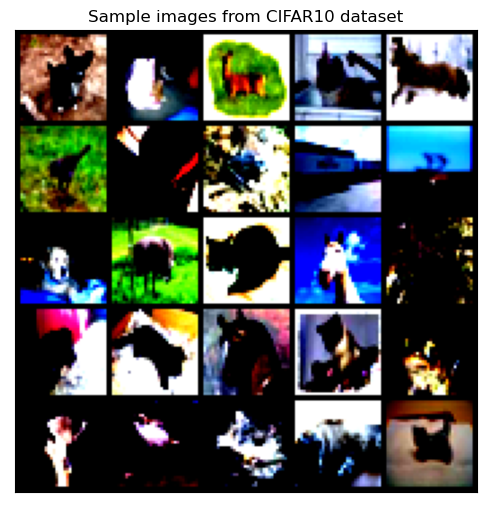

In [60]:
#plot images in input data
from torchvision.utils import make_grid
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Sample images from CIFAR10 dataset")
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(make_grid(data["inputs"].cpu()[:25],nrow=5).permute(1,2,0).numpy())
plt.show()

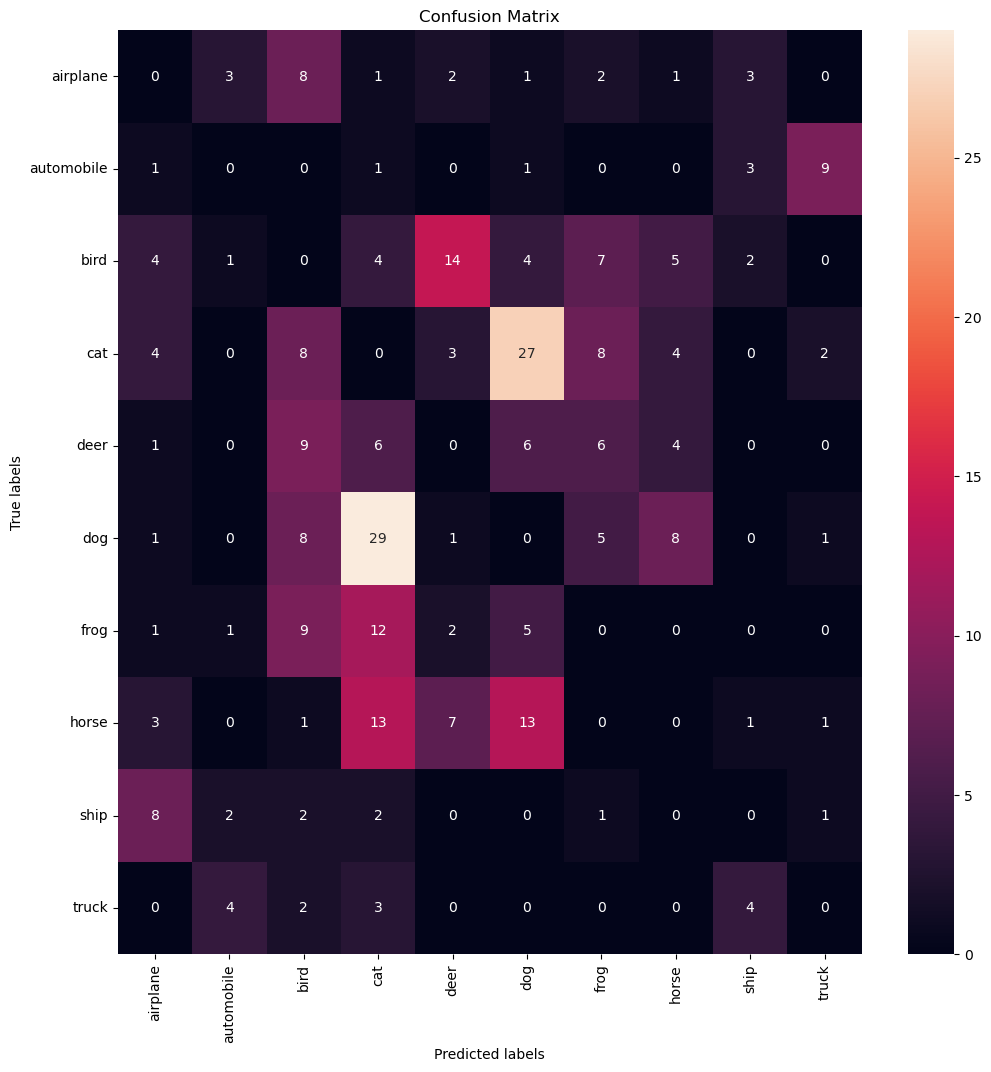

In [61]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
cm = confusion_matrix(data["targets"].cpu().numpy(),torch.argmax(data["probs"],dim=1).cpu().numpy())
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, ax=ax,fmt='g',xticklabels=class_labels,yticklabels=class_labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels,rotation=90)
ax.yaxis.set_ticklabels(class_labels,rotation=0)
plt.show()

<AxesSubplot:>

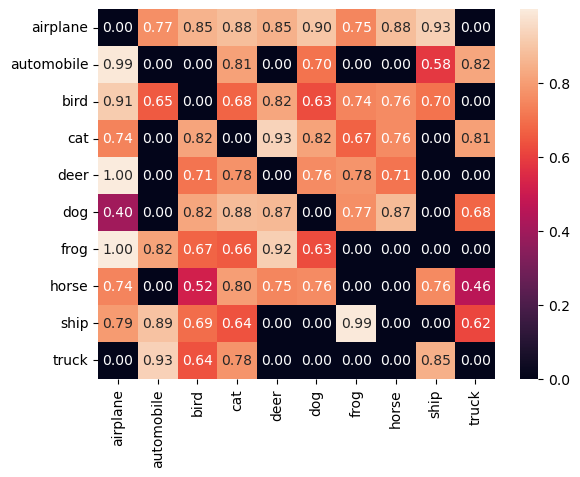

: 

In [62]:
#how confident is the model in its incorrect predictions
import pandas as pd
df = pd.DataFrame(zip(data["targets"].cpu().numpy(),torch.argmax(data["probs"],dim=1).cpu().numpy(),torch.max(data["probs"],dim=1).values.cpu().numpy()))
sns.heatmap(df.pivot_table(index=0,columns=1,values=2,aggfunc="mean").fillna(0).to_numpy(),annot=True, fmt=".2f",xticklabels=class_labels,yticklabels=class_labels)